In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import roc_curve,auc, accuracy_score, recall_score, roc_auc_score, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv('heart.csv')
df['FastingBS'] = df['FastingBS'].astype('object')
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    object 
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 86.2+ KB
None


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
print("Tổng giá trị thiếu:")
print( df.isnull().sum())
print("Tổng các hàng bị trùng:")
print(df.duplicated().sum())

Tổng giá trị thiếu:
Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64
Tổng các hàng bị trùng:
0


In [4]:
df.describe(include=np.number)

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,1.000000


In [5]:
df.describe(include=object)

,Sex,ChestPainType,FastingBS,RestingECG,ExerciseAngina,ST_Slope
count,918,918,918,918,918,918
unique,2,4,2,3,2,3
top,M,ASY,0,Normal,N,Flat
freq,725,496,704,552,547,460


In [6]:
scaler = StandardScaler()
df[['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']] = scaler.fit_transform(df[['Age', 'RestingBP', 'Cholesterol',
                                                                                                    'MaxHR', 'Oldpeak']])
df.head(20)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,-1.433140,M,ATA,0.410909,0.825070,0,Normal,1.382928,N,-0.832432,Up,0
1,-0.478484,F,NAP,1.491752,-0.171961,0,Normal,0.754157,N,0.105664,Flat,1
2,-1.751359,M,ATA,-0.129513,0.770188,0,ST,-1.525138,N,-0.832432,Up,0
3,-0.584556,F,ASY,0.302825,0.139040,0,Normal,-1.132156,Y,0.574711,Flat,1
4,0.051881,M,NAP,0.951331,-0.034755,0,Normal,-0.581981,N,-0.832432,Up,0
5,-1.539213,M,NAP,-0.669935,1.282424,0,Normal,1.304332,N,-0.832432,Up,0
6,-0.902775,F,ATA,-0.129513,0.349422,0,Normal,1.304332,N,-0.832432,Up,0
7,0.051881,M,ATA,-1.210356,0.084157,0,Normal,0.203982,N,-0.832432,Up,0
8,-1.751359,M,ASY,0.410909,0.075010,0,Normal,-0.267596,Y,0.574711,Flat,1
9,-0.584556,F,ATA,-0.669935,0.779335,0,Normal,-0.660578,N,-0.832432,Up,0


In [7]:
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['ChestPainType'] = le.fit_transform(df['ChestPainType'])
df['FastingBS'] = le.fit_transform(df['FastingBS'])
df['ExerciseAngina'] = le.fit_transform(df['ExerciseAngina'])
df['RestingECG'] = le.fit_transform(df['RestingECG'])
df['ST_Slope'] = le.fit_transform(df['ST_Slope'])
df.head(20)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,-1.433140,1,1,0.410909,0.825070,0,1,1.382928,0,-0.832432,2,0
1,-0.478484,0,2,1.491752,-0.171961,0,1,0.754157,0,0.105664,1,1
2,-1.751359,1,1,-0.129513,0.770188,0,2,-1.525138,0,-0.832432,2,0
3,-0.584556,0,0,0.302825,0.139040,0,1,-1.132156,1,0.574711,1,1
4,0.051881,1,2,0.951331,-0.034755,0,1,-0.581981,0,-0.832432,2,0
5,-1.539213,1,2,-0.669935,1.282424,0,1,1.304332,0,-0.832432,2,0
6,-0.902775,0,1,-0.129513,0.349422,0,1,1.304332,0,-0.832432,2,0
7,0.051881,1,1,-1.210356,0.084157,0,1,0.203982,0,-0.832432,2,0
8,-1.751359,1,0,0.410909,0.075010,0,1,-0.267596,1,0.574711,1,1
9,-0.584556,0,1,-0.669935,0.779335,0,1,-0.660578,0,-0.832432,2,0


In [8]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    float64
 1   Sex             918 non-null    int64  
 2   ChestPainType   918 non-null    int64  
 3   RestingBP       918 non-null    float64
 4   Cholesterol     918 non-null    float64
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    int64  
 7   MaxHR           918 non-null    float64
 8   ExerciseAngina  918 non-null    int64  
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    int64  
 11  HeartDisease    918 non-null    int64  
dtypes: float64(5), int64(7)
memory usage: 86.2 KB
None


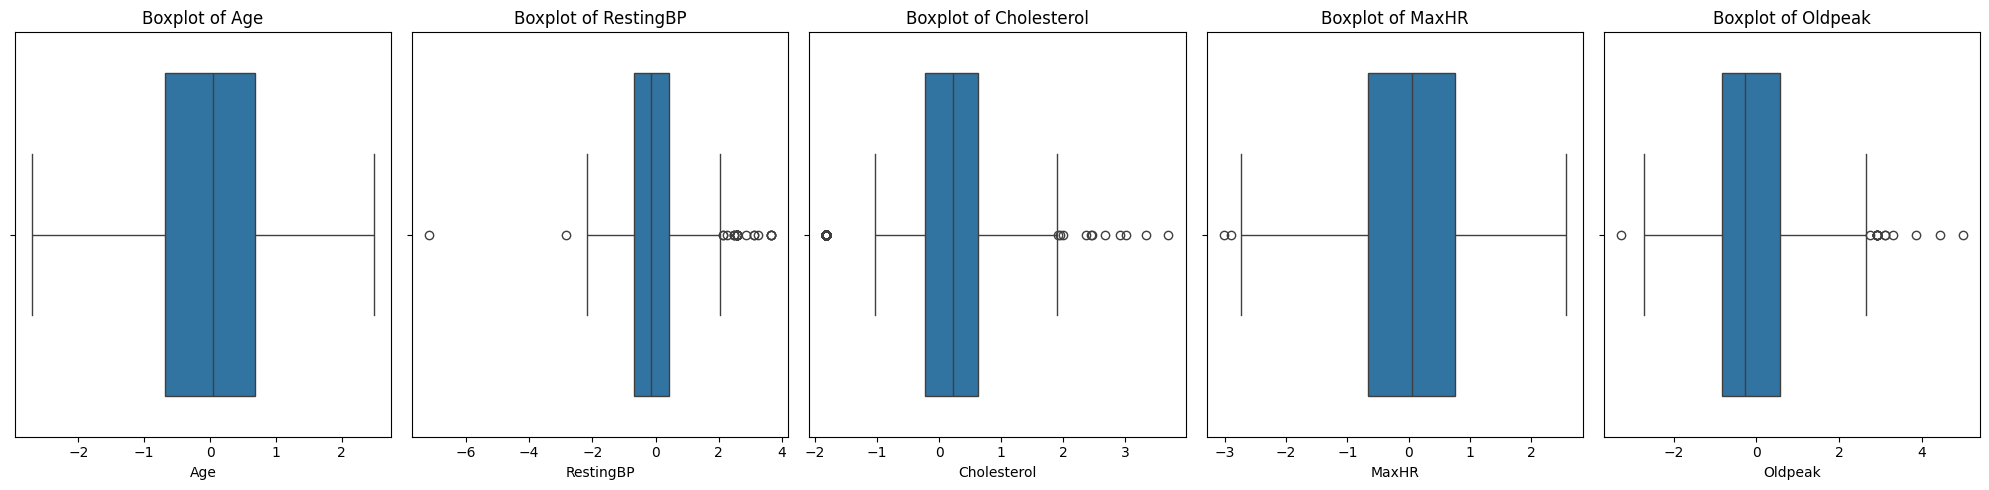

In [9]:
numeric_columns = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
fig, axes = plt.subplots(nrows=1, ncols=len(numeric_columns), figsize=(20, 5))
for i, col in enumerate(numeric_columns):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

In [10]:
def draw_boxplots(feature, df_original, df_cleaned):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.boxplot(x=df_original[feature])
    plt.title(f'Boxplot of {feature} (Before Cleaning)')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df_cleaned[feature])
    plt.title(f'Boxplot of {feature} (After Cleaning)')
    plt.tight_layout()
    plt.show()

Original shape: (918, 12), Cleaned shape: (890, 12)


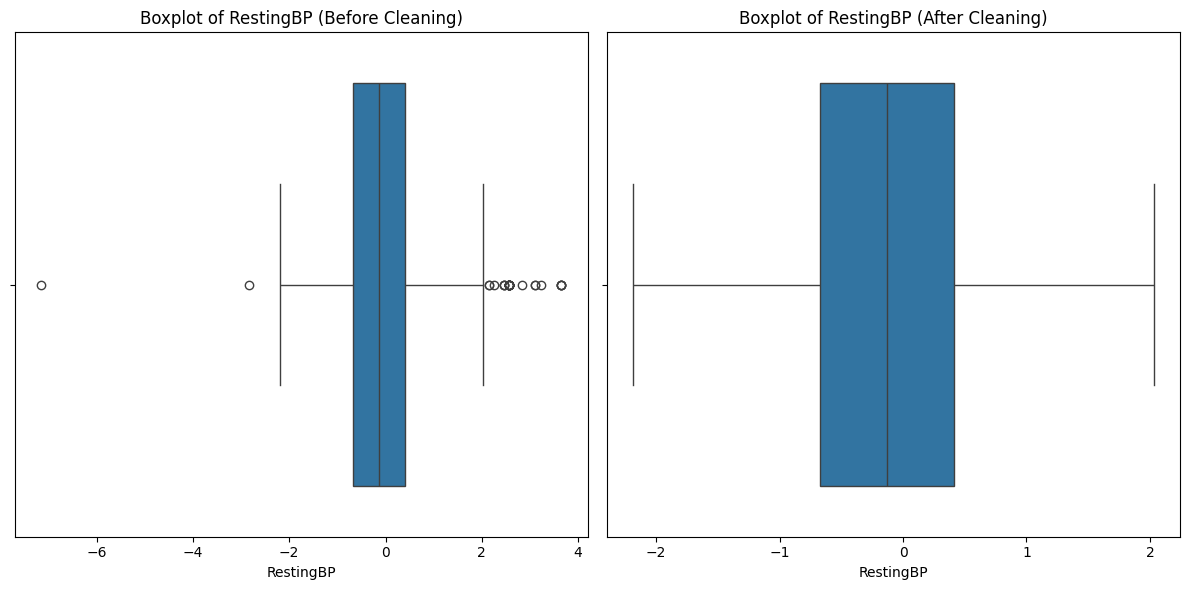

Original shape: (890, 12), Cleaned shape: (701, 12)


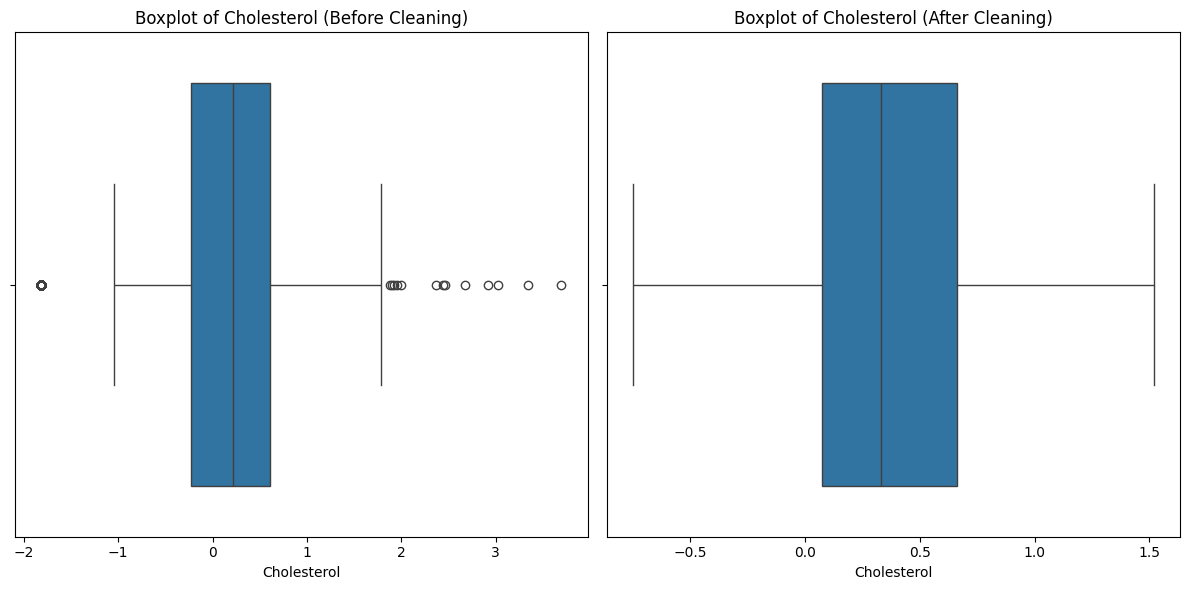

Original shape: (701, 12), Cleaned shape: (685, 12)


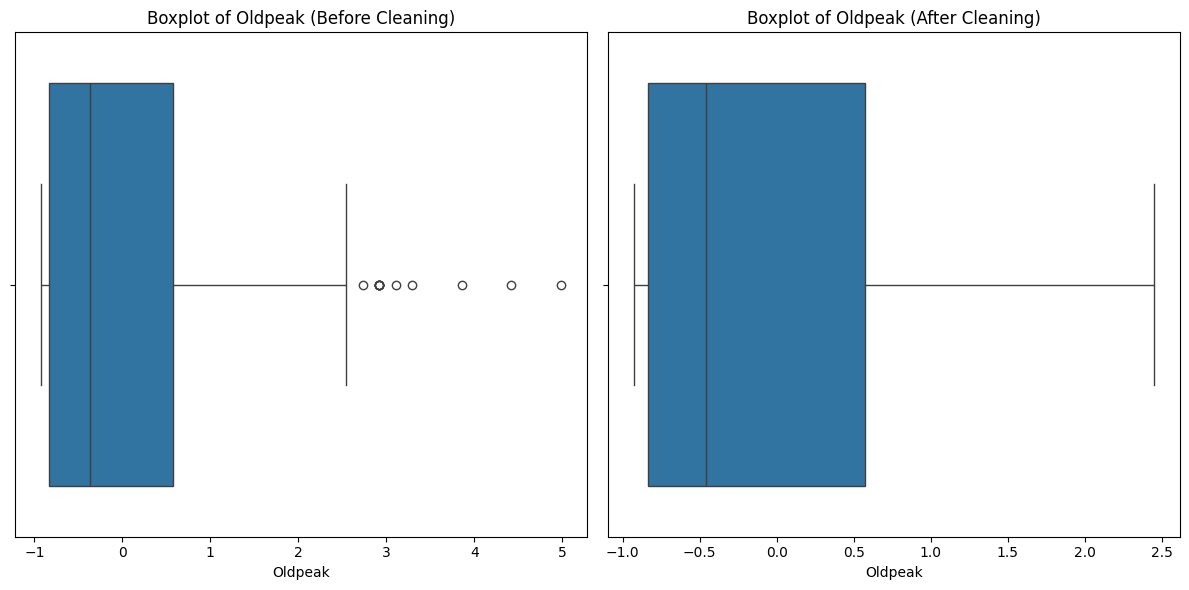

In [11]:

def clean_feature_with_min_max(df, feature, min_quantile, max_quantile):
    min_val = df[feature].quantile(min_quantile)  
    max_val = df[feature].quantile(max_quantile) 
    df_cleaned = df[(df[feature] > min_val) & (df[feature] < max_val)]
    print(f'Original shape: {df.shape}, Cleaned shape: {df_cleaned.shape}')
    draw_boxplots(feature, df, df_cleaned) 
    return df_cleaned
def clean_feature_only_max(df, feature, max_quantile):
    max_val = df[feature].quantile(max_quantile)  
    df_cleaned = df[df[feature] < max_val]  
    print(f'Original shape: {df.shape}, Cleaned shape: {df_cleaned.shape}')
    draw_boxplots(feature, df, df_cleaned)  
    return df_cleaned
df2 = df.copy()

df2 = clean_feature_with_min_max(df2, 'RestingBP', 0.002, 0.972)
df2 = clean_feature_with_min_max(df2, 'Cholesterol', 0.19, 0.978)
df2 = clean_feature_only_max(df2, 'Oldpeak', 0.98)


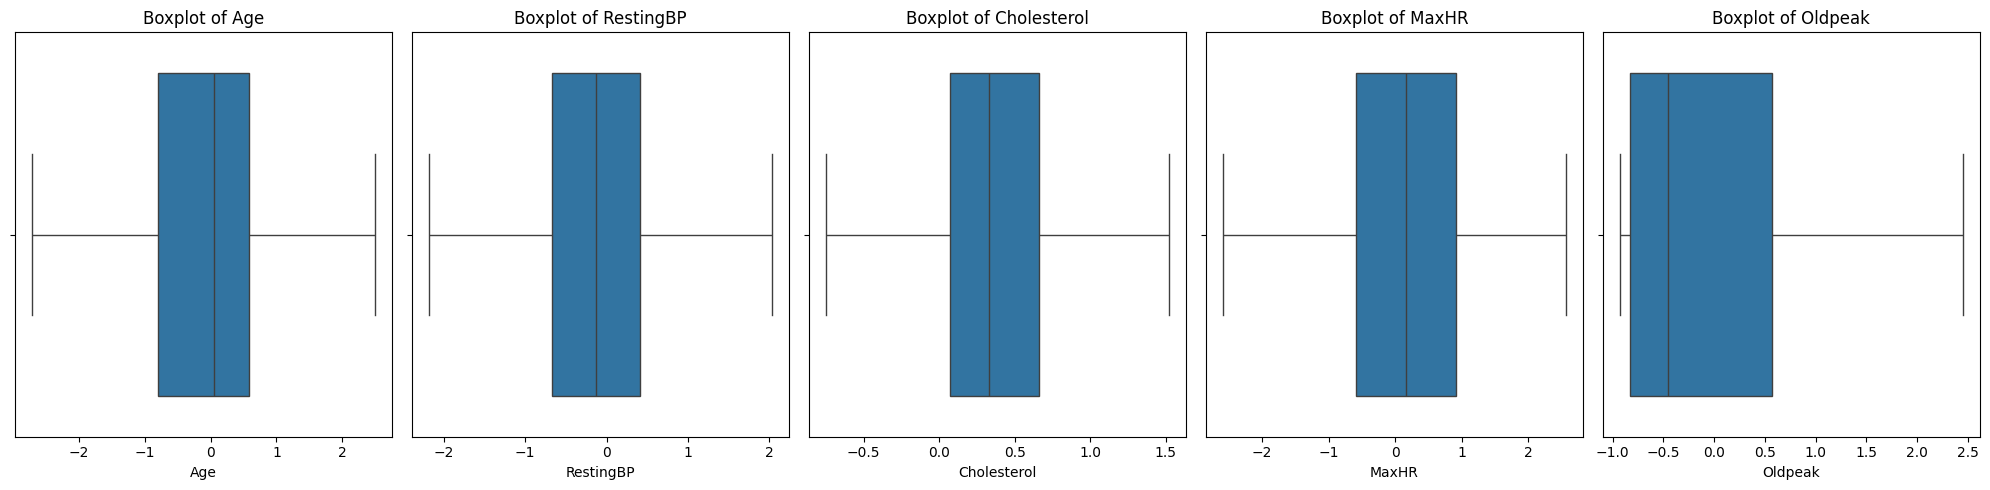

In [12]:
numeric_columns = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
fig, axes = plt.subplots(nrows=1, ncols=len(numeric_columns), figsize=(20, 5))
for i, col in enumerate(numeric_columns):
    sns.boxplot(x=df2[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

In [13]:
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease'].values.reshape(-1, 1)  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print("Training set shape (X_train, y_train):", X_train.shape, y_train.shape)
print("Test set shape (X_test, y_test):", X_test.shape, y_test.shape)


Training set shape (X_train, y_train): (642, 11) (642, 1)
Test set shape (X_test, y_test): (276, 11) (276, 1)


In [14]:
y_train = y_train.ravel()
y_test = y_test.ravel()


In [15]:
def plot_roc_curve(classifier, X_test, y_test):
    y_prob = classifier.predict_proba(X_test)[:, 1] 
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()

In [16]:
def model(classifier):
    classifier.fit(X_train, y_train)
    prediction = classifier.predict(X_test)
    
    cv = StratifiedKFold(n_splits=9, shuffle=True, random_state=42)
    cv_scores = cross_val_score(classifier, X_train, y_train, cv=cv, scoring='accuracy')
    print("Accuracy : ", '{0:.2%}'.format(accuracy_score(y_test, prediction)))
    print("Cross Validation Score (accuracy 9 folds): ", '{0:.2%}'.format(cv_scores.mean()))
    print("ROC_AUC Score : ", '{0:.2%}'.format(roc_auc_score(y_test, classifier.predict_proba(X_test)[:, 1])))
    print("Recall : ", '{0:.2f}'.format(recall_score(y_test, prediction, average='weighted')))
    plot_roc_curve(classifier, X_test, y_test)
   
def model_evaluation(classifier):
    print("Classification Report:")
    print(classification_report(y_test, classifier.predict(X_test)))

Accuracy :  87.32%
Cross Validation Score (accuracy 9 folds):  84.89%
ROC_AUC Score :  93.30%
Recall :  0.87


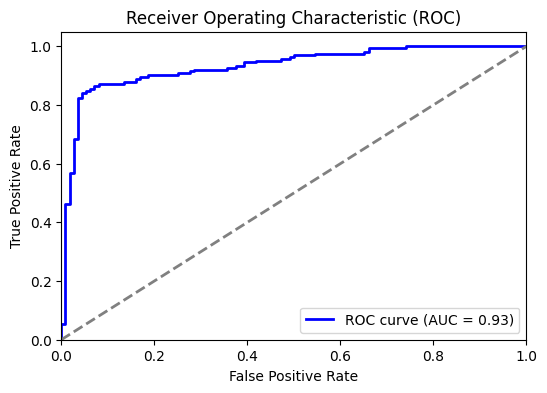

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       112
           1       0.91      0.87      0.89       164

    accuracy                           0.87       276
   macro avg       0.87      0.87      0.87       276
weighted avg       0.88      0.87      0.87       276



In [17]:
nb_model = GaussianNB()
model(nb_model)
model_evaluation(nb_model)

In [18]:
y_true_200 = np.array(y_test[:200])

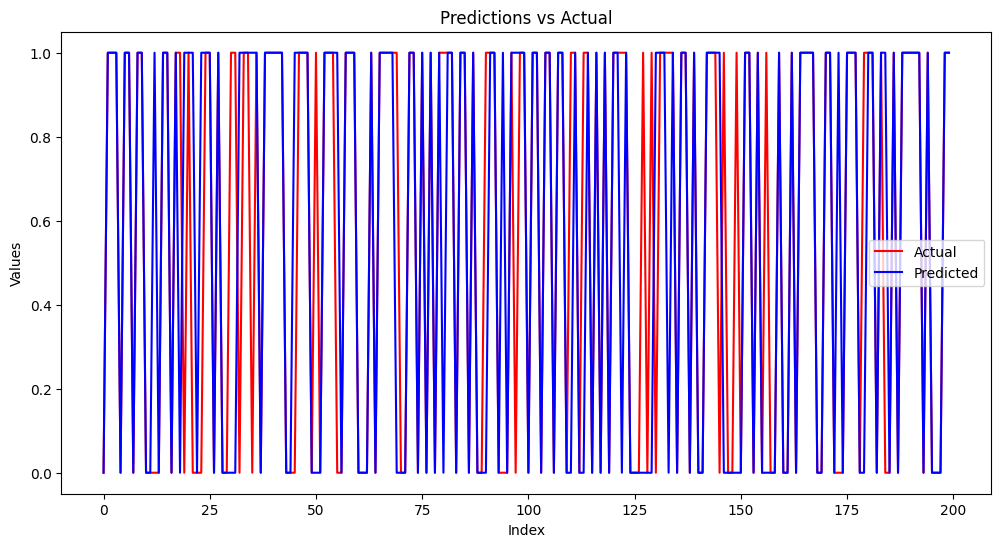

In [19]:
nb_predictions = np.array(nb_model.predict(X_test)[:200]) 
plt.figure(figsize=(12, 6))
plt.plot(y_true_200[:200], label='Actual', color='red')
plt.plot(nb_predictions[:200], label='Predicted', color='blue')
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Predictions vs Actual')
plt.legend()
plt.show()

Accuracy :  89.49%
Cross Validation Score (accuracy 9 folds):  85.83%
ROC_AUC Score :  95.00%
Recall :  0.89


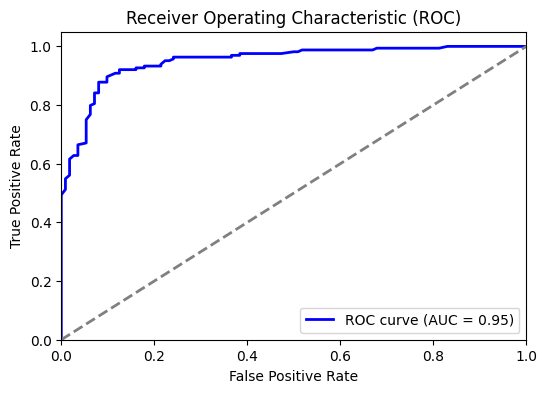

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.90      0.87       112
           1       0.93      0.89      0.91       164

    accuracy                           0.89       276
   macro avg       0.89      0.90      0.89       276
weighted avg       0.90      0.89      0.90       276



In [20]:
rf_model = RandomForestClassifier(n_estimators=200, max_features=1, random_state=1)
model(rf_model)
model_evaluation(rf_model)

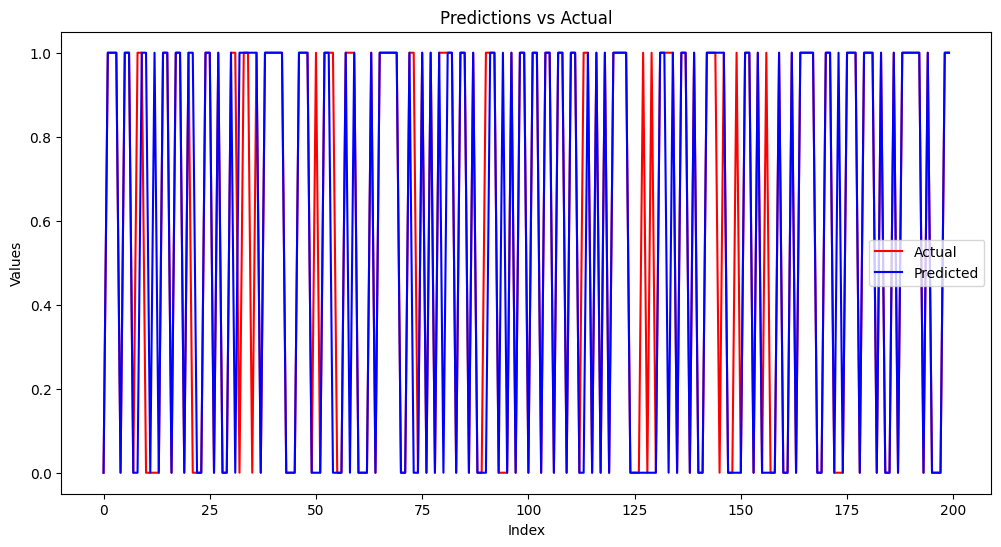

In [21]:
rf_predictions = np.array(rf_model.predict(X_test)[:200])
plt.figure(figsize=(12, 6))
plt.plot(y_true_200[:200], label='Actual', color='red')
plt.plot(rf_predictions[:200], label='Predicted', color='blue')
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Predictions vs Actual')
plt.legend()
plt.show()

Feature ranking:
1. ST_Slope (0.1502)
2. Oldpeak (0.1234)
3. MaxHR (0.1225)
4. Cholesterol (0.1130)
5. Age (0.1084)
6. ExerciseAngina (0.1016)
7. ChestPainType (0.0966)
8. RestingBP (0.0832)
9. Sex (0.0389)
10. RestingECG (0.0316)
11. FastingBS (0.0305)


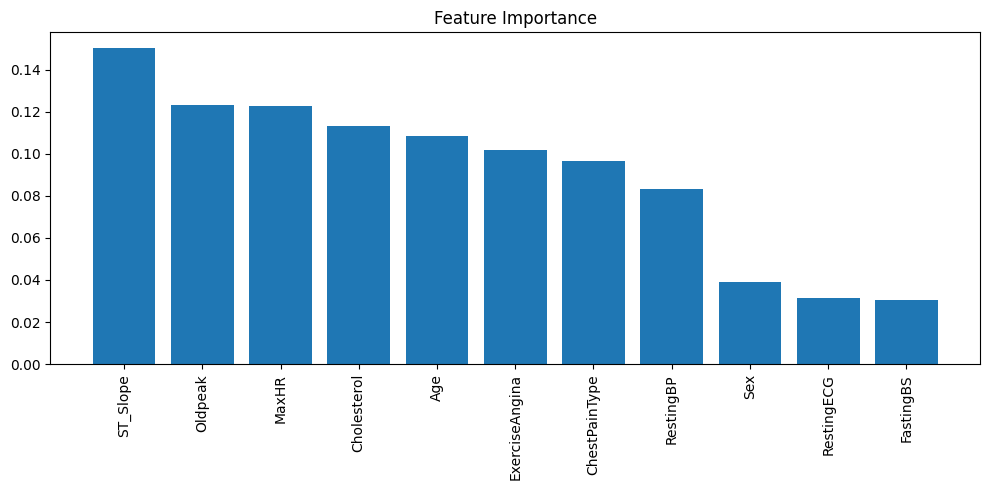

In [22]:
importances = rf_model.feature_importances_
features = X_train.columns
indices = np.argsort(importances)[::-1]
print("Feature ranking:")
for i in range(X_train.shape[1]):
    print(f"{i + 1}. {features[indices[i]]} ({importances[indices[i]]:.4f})")
plt.figure(figsize=(10, 5))
plt.title("Feature Importance")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), features[indices], rotation=90)
plt.tight_layout()
plt.show()

Accuracy :  83.50%
Cross Validation Score (accuracy 9 folds):  82.46%
ROC_AUC Score :  90.13%
Recall :  0.83


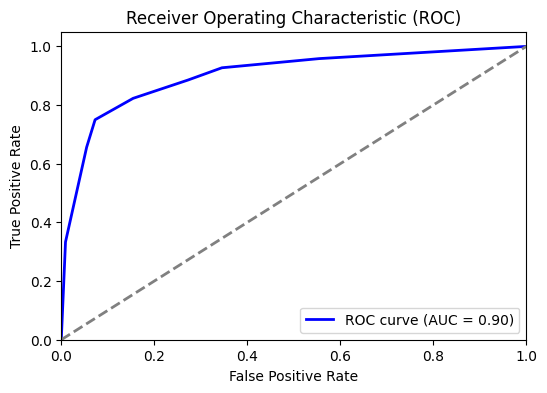

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.85      0.85       110
           1       0.82      0.82      0.82        96

    accuracy                           0.83       206
   macro avg       0.83      0.83      0.83       206
weighted avg       0.83      0.83      0.83       206



In [23]:
X = df2.drop('HeartDisease', axis=1)
y = df2['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
knn_model = KNeighborsClassifier(n_neighbors=7)
model(knn_model)
model_evaluation(knn_model)

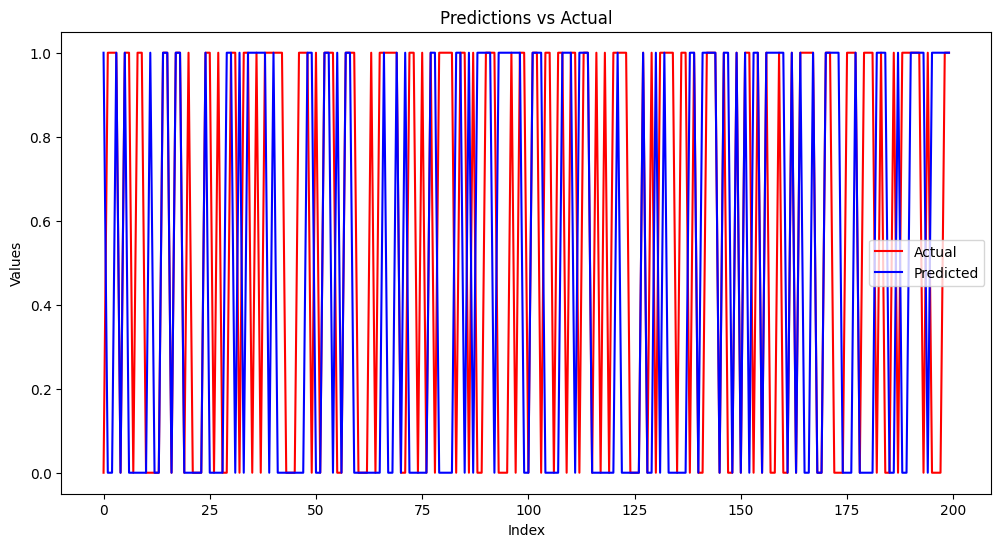

In [24]:
knn_predictions = np.array(knn_model.predict(X_test)[:200])
plt.figure(figsize=(12, 6))
plt.plot(y_true_200[:200], label='Actual', color='red')
plt.plot(knn_predictions[:200], label='Predicted', color='blue')
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Predictions vs Actual')
plt.legend()
plt.show()

In [25]:
import gradio as gr
def predict_with_all_models(age, sex, chest_pain, resting_bp, cholesterol, fasting_bs, resting_ecg, max_hr, exercise_angina, oldpeak, st_slope):
    input_data = [[age, sex, chest_pain, resting_bp, cholesterol, fasting_bs, resting_ecg, max_hr, exercise_angina, oldpeak, st_slope]]
    nb_prediction = nb_model.predict(input_data)
    knn_prediction = knn_model.predict(input_data)
    rf_prediction = rf_model.predict(input_data)
    nb_result = "Có bệnh tim" if nb_prediction[0] == 1 else "Không có bệnh tim"
    knn_result = "Có bệnh tim" if knn_prediction[0] == 1 else "Không có bệnh tim"
    rf_result = "Có bệnh tim" if rf_prediction[0] == 1 else "Không có bệnh tim"
    return nb_result, knn_result, rf_result
inputs = [
    gr.Number(label="Age"),
    gr.Radio([0, 1], label="Sex (0: Nữ, 1: Nam)"),
    gr.Radio([0, 1, 2, 3], label="Chest Pain Type (0: ASY, 1: ATA, 2: NAP, 3: TA)"),
    gr.Number(label="Resting BP"),
    gr.Number(label="Cholesterol"),
    gr.Radio([0, 1], label="Fasting BS (0: Không, 1: Trên 120mg/dl)"),
    gr.Radio([0, 1, 2], label="Resting ECG (0: LVH, 1: Normal, 2: ST)"),
    gr.Number(label="Max HR"),
    gr.Radio([0, 1], label="Exercise Angina (0: Không, 1: Có)"),
    gr.Number(label="Oldpeak"),
    gr.Radio([0, 1, 2], label="ST Slope (0: Down, 1: Flat, 2: Up)")
]

outputs = [
    gr.Textbox(label="Naive Bayes Prediction"),
    gr.Textbox(label="KNN Prediction"),
    gr.Textbox(label="Random Forest Prediction")
]
interface = gr.Interface(
    fn=predict_with_all_models,
    inputs=inputs,
    outputs=outputs,
    title="Dự đoán Bệnh Tim với Ba Mô Hình",
    description="Nhập các thông số để dự đoán bệnh tim bằng ba mô hình khác nhau"
)
interface.launch()


C:\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


* Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


C:\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
C:\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
C:\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with fea